# Example notebook

This shows an example of how we have solved the model. In this example we solve for the college educated, and after that simulate the the results.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
from model import Model
from simulator import Simulator
from parameters import parameters as par

In [8]:
from modules.consumptionpreference import create_consumption_preference_array
from modules.agepolynomial import create_age_poly_array

### Parameters

In [2]:
start_age = 25
educ = 'College' # Can be either '<HS', 'HS' or 'College'

par.start_age = start_age

# Change education parameters (age-polynomial income profile and number of children n)
par.age_poly = create_age_poly_array(educ)
par.n = create_consumption_preference_array(educ)

# Solving the model
### Instantiate the model

In [3]:
m = Model()

### Solving the model

takes approx. 30 minutes.

In [4]:
V_sol, C_sol = m.solve(par)

# Simulating the model

In [10]:
NUMBER_OF_PERSONS = 1000
states, choices, shocks = Simulator.simulate(V_sol, C_sol, par, NUMBER_OF_PERSONS)

### Figures from simulation

In [11]:
FIGSIZE = (12, 18)

### State Plots

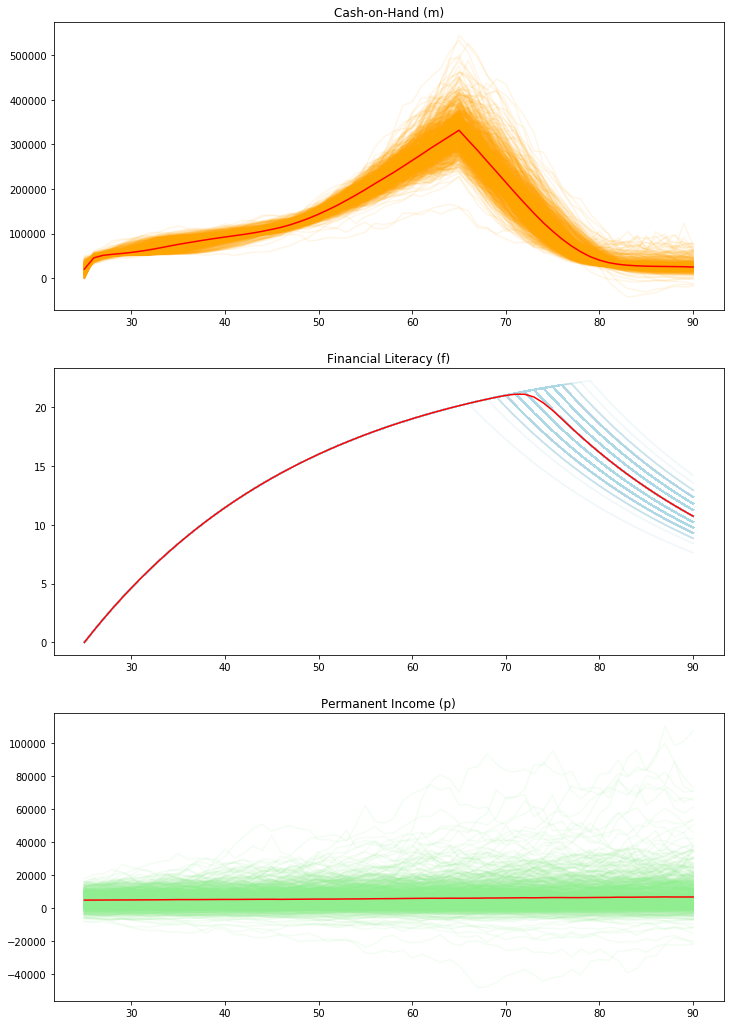

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=FIGSIZE)
ax1.set_title("Cash-on-Hand (m)")
ax1.plot(range(25, 91), states[0,:], alpha=0.1, color='orange')
ax1.plot(range(25, 91), states[0,:].mean(axis=1), color='red')

ax2.set_title("Financial Literacy (f)")
ax2.plot(range(25, 91), states[1,:], alpha=0.1, color='lightblue')
ax2.plot(range(25, 91), states[1,:].mean(axis=1), color='red')

ax3.set_title("Permanent Income (p)")
ax3.plot(range(25, 91), states[2,:], alpha=0.1, color='lightgreen')
ax3.plot(range(25, 91), states[2,:].mean(axis=1), color='red')


### Choice Plots

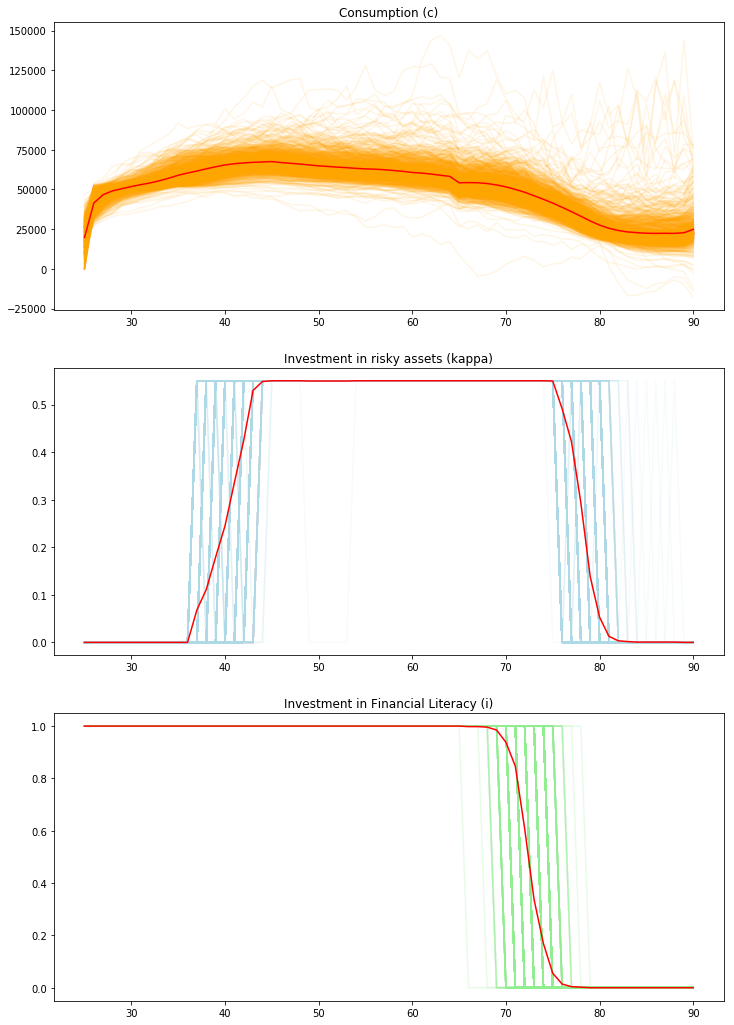

In [13]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=FIGSIZE)
ax1.set_title("Consumption (c)")
ax1.plot(range(25, 91), choices[0,:], alpha=0.1, color='orange')
ax1.plot(range(25, 91), choices[0,:].mean(axis=1), color='red')

ax2.set_title("Investment in risky assets (kappa)")
ax2.plot(range(25, 91), choices[1,:], alpha=0.1, color='lightblue')
ax2.plot(range(25, 91), choices[1,:].mean(axis=1), color='red')

ax3.set_title("Investment in Financial Literacy (i)")
ax3.plot(range(25, 91), choices[2,:], alpha=0.1, color='lightgreen')
ax3.plot(range(25, 91), choices[2,:].mean(axis=1), color='red')